# Exercise 5: Time-delay Embedding (Task 4: Part 2 (Lorenz))

In [1]:
# All imports
import numpy as np
from utils import *
from scipy.integrate import solve_ivp

%reload_ext autoreload
%autoreload 2
# TODO: Import necessary python files to simulate the lorenz attractor from the previous exercise


### TODO: Generate data for Lorenz attractor (using prev exercise)

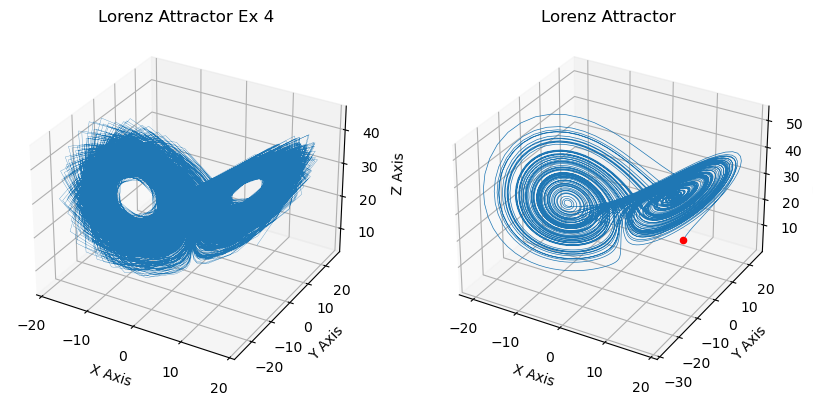

In [2]:
# TODO: Generate lorenz_dataectory data by simulating the Lorenz attractor

# TODO: Visualize lorenz attractor

# Define Lorenz system
def lorenz (t, state , sigma , beta , rho ):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * ( rho - z) - y
    dz = x * y - beta * z
    return [dx , dy , dz]

 # Parameters and initial state
sigma , beta , rho = 10, 8/3 , 28
initial_state = [10 , 10, 10]

 # Solve ODE
sol = solve_ivp(lorenz , [0, 1000] , initial_state , args =( sigma , beta , rho ), t_eval =np.
linspace (0, 1000 , 10000) )

# implementation on matplotlib page
def lorenz_(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (10, 10, 10)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz_(xyzs[i]) * dt

 # Plot trajectory
fig = plt.figure('Lorenz attractors', (10,5))
ax = fig.add_subplot(121 , projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor Ex 4")

# Plot
ax_2 = fig.add_subplot(122,projection='3d')
ax_2.scatter(10,10,10, color='r')
ax_2.plot(*xyzs.T,lw=0.5)
ax_2.set_xlabel("X Axis")
ax_2.set_ylabel("Y Axis")
ax_2.set_zlabel("Z Axis")
ax_2.set_title("Lorenz Attractor")

plt.show()

### TODO: Create and visualize time-delayed x coordinates from Lorenz data in a 3-d Euclidean space


(0.0, 2500.0)

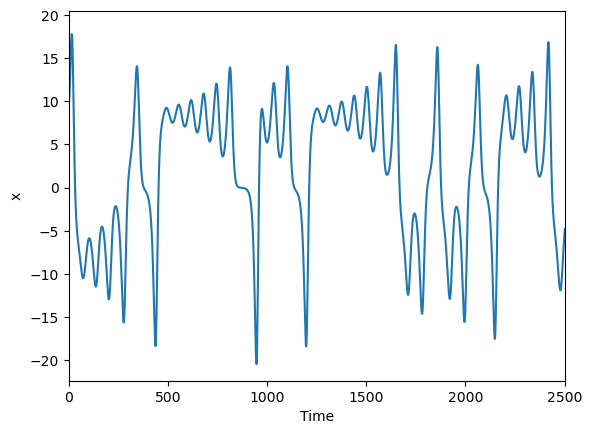

In [3]:
x = xyzs[:,0]
time = np.arange(len(x))
plt.plot(time,x)
plt.xlabel("Time")
plt.ylabel("x")
plt.xlim(0,2500)

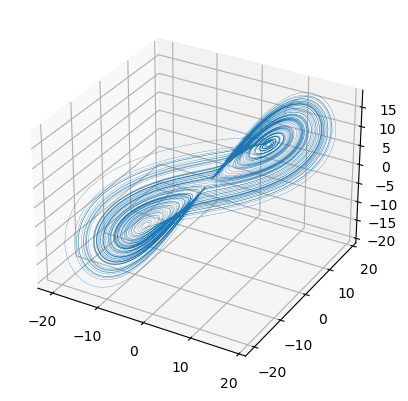

In [39]:
# Hint: Use method time_delay from utils.py
delta_t = 5
delayed_x = time_delay(xyzs,0, delta_t=delta_t,out_dim=3)
x_2 = delayed_x[:,2]
x_1 = delayed_x[:,1]
x_0 = delayed_x[:,0]

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x_0,x_1, x_2, lw=0.2)
plt.show()

### TODO: Create and visualize time-delayed z coordinates from Lorenz data in a 3-d Euclidean space


(0.0, 2500.0)

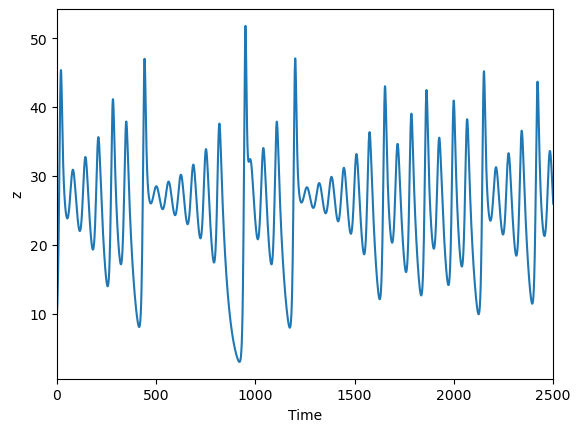

In [61]:
z = xyzs[:,2]
time = np.arange(len(z))
plt.plot(time,z)
plt.xlabel("Time")
plt.ylabel("z")
plt.xlim(0,2500)

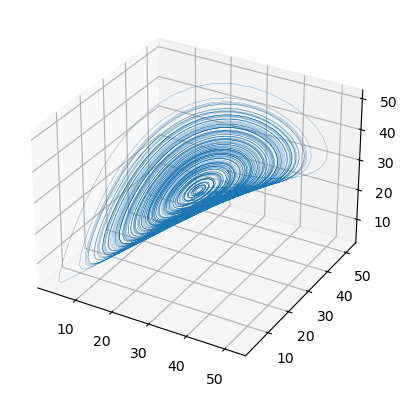

In [62]:
# Hint: Use method time_delay from utils.py
# Hint: Use method time_delay from utils.py
delayed_z = time_delay(xyzs,2, delta_t=delta_t,out_dim=3)
z_2 = delayed_z[:,2]
z_1 = delayed_z[:,1]
z_0 = delayed_z[:,0]

ax = plt.figure().add_subplot(projection='3d')
ax.plot(z_0,z_1, z_2, lw=0.2)
plt.show()

### TODO: Bonus task
Approximating vector field

In [63]:
delayed_x

array([[10.        , 11.45810292, 15.02060327],
       [10.        , 12.08043137, 15.7515597 ],
       [10.17      , 12.76848617, 16.4230208 ],
       ...,
       [ 7.28649595,  6.74944132,  6.56996786],
       [ 7.15328258,  6.68370121,  6.57904126],
       [ 7.03222808,  6.63276447,  6.60295725]])

In [5]:
# computing vector field v, delta_t=1 in between 2 consecutive rows
v = np.diff(delayed_x, axis=0)
v

array([[ 0.        ,  0.62232845,  0.73095642],
       [ 0.17      ,  0.6880548 ,  0.6714611 ],
       [ 0.313967  ,  0.73429076,  0.57745283],
       ...,
       [-0.14438049, -0.08027823, -0.0058946 ],
       [-0.13321337, -0.06574012,  0.00907341],
       [-0.1210545 , -0.05093674,  0.02391598]])

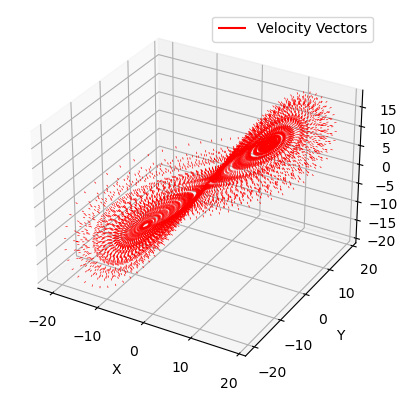

In [6]:
# Midpoints for vector plotting (optional)
midpoints = (delayed_x[:-1] + delayed_x[1:]) / 2

# Plotting the vector field
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original points
#ax.plot(delayed_x[:, 0], delayed_x[:, 1], delayed_x[:, 2], 'o-', label='Trajectory')

# Quiver plot for velocity vectors
ax.quiver(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2],
          v[:, 0], v[:, 1], v[:, 2],
          length=0.1, normalize=True, color='r', label='Velocity Vectors')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

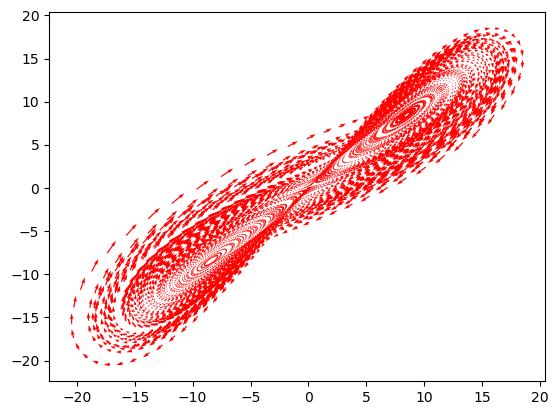

In [7]:
plt.quiver(midpoints[:, 0], midpoints[:, 1],
          v[:, 0], v[:, 1], color='r', label='Velocity Vectors')

In [67]:
#SOLVING THE DIFFERENTIAL EQUATION

In [47]:
L = 150
#x = np.linspace(-4.5, 4.5, L)
centers = 42*np.random.random_sample((L,3)) -21

In [48]:
delayed_x[:len(v)]

array([[10.        , 11.45810292, 15.02060327],
       [10.        , 12.08043137, 15.7515597 ],
       [10.17      , 12.76848617, 16.4230208 ],
       ...,
       [ 7.43087643,  6.82971955,  6.57586245],
       [ 7.28649595,  6.74944132,  6.56996786],
       [ 7.15328258,  6.68370121,  6.57904126]])

In [49]:
centers

array([[-18.13451477,  17.55278826,  -9.85903502],
       [-15.68565037, -13.16073394,   7.94823198],
       [ -3.47463711,  19.73970175,   7.90518227],
       [ -1.47888903,  -5.71626175,   6.65310487],
       [  6.1946352 ,   1.79784947, -17.58534082],
       [ 14.17308814, -20.24661784,  -2.63058032],
       [ 17.67048124, -11.96539806,  12.94667477],
       [  1.03902912,   0.03428262, -12.92154153],
       [  0.88041551, -18.515898  , -14.14104038],
       [ -3.40362291,  10.23798373, -16.79800496],
       [ 11.40030504, -19.01630414, -15.89921844],
       [ 10.61681589,  -4.92669281,   6.64869617],
       [-19.65120697,  -2.11361154,  -2.7128811 ],
       [-14.01386128, -19.15499241, -13.76740814],
       [  6.58789921,  -8.81854955,  15.88901336],
       [-15.64919473,  -6.41323403,   6.17844091],
       [ 17.31628713,  -5.40999226,  -6.02259342],
       [ -7.17516314,  17.66331041,  -5.21254549],
       [ -2.41788439,  19.54283703,  -9.43840659],
       [-11.75188014, -14.32870

In [50]:
phi = approx_non_linear_field(delayed_x[:len(v)],centers, 0.185)
C =  least_squares(phi.T, v)
approx_field = np.dot(phi.T, C)
def g(t, y):
    y = y.reshape(len(v),3)
    phi_ = approx_non_linear_field(y,centers, 0.185)
    C =  least_squares(phi_.T, v)
    return np.dot(phi_.T,C).flatten()

mean_squared_error(v, approx_field)

0.0007549810961432026

In [51]:
delta_T = 0.01
T_end = 100
t_eval =np.linspace (0, T_end , 100)
SOL = solve_ivp(g, [0,T_end], delayed_x[:len(v)].flatten(), t_eval= t_eval)

In [52]:
solutions = SOL.y.T

In [53]:
len(solutions)

100

In [54]:
traj_estim = solutions[:,0:3]

In [55]:
traj_estim_2 = solutions[:,4:7]
traj_estim_2

array([[12.08043137, 15.7515597 , 10.17      ],
       [12.96021299, 16.69795446, 10.5205822 ],
       [13.8008172 , 17.64027733, 10.93444744],
       [14.49737162, 18.68290654, 11.15300911],
       [15.18717321, 19.65609445, 11.41036104],
       [15.85586187, 20.50141209, 11.72878869],
       [16.497202  , 21.25741061, 12.05798347],
       [17.11928007, 21.95860039, 12.40633527],
       [17.72721989, 22.630096  , 12.76627974],
       [18.37393841, 23.31686017, 13.18795575],
       [19.07647311, 24.00597   , 13.70737979],
       [19.77128127, 24.68788987, 14.24610002],
       [20.46077187, 25.36867497, 14.78366506],
       [21.11583339, 26.00170258, 15.29478229],
       [21.74198289, 26.58699065, 15.78373092],
       [22.33786798, 27.13567201, 16.2514817 ],
       [22.90592917, 27.65951805, 16.70019453],
       [23.46053327, 28.16803935, 17.1410634 ],
       [24.02214121, 28.66971696, 17.58955178],
       [24.57783553, 29.16941266, 18.03515732],
       [25.12246599, 29.65865524, 18.475

In [72]:
traj_estim_3 = solutions[:,4400:4403]

In [73]:
traj_estim_3

array([[ 6.0075    ,  5.74947604,  5.70956209],
       [ 6.12177123,  5.70292402,  5.75125902],
       [ 6.23792351,  5.65727527,  5.79512207],
       [ 6.35376361,  5.60341015,  5.83716048],
       [ 6.4694609 ,  5.55682921,  5.88017701],
       [ 6.58149592,  5.51972058,  5.92435984],
       [ 6.68829381,  5.5025634 ,  5.97476371],
       [ 6.7929625 ,  5.50126661,  6.03046939],
       [ 6.89776591,  5.5116367 ,  6.09045246],
       [ 7.00989977,  5.54144033,  6.16226986],
       [ 7.12878755,  5.60303662,  6.25177574],
       [ 7.24854993,  5.66949127,  6.34450381],
       [ 7.37105918,  5.73980272,  6.44140695],
       [ 7.49353983,  5.81369313,  6.54071027],
       [ 7.61625173,  5.89164478,  6.64312503],
       [ 7.74012038,  5.9725642 ,  6.74738214],
       [ 7.86587371,  6.05575058,  6.85284652],
       [ 7.99399246,  6.14279777,  6.96171129],
       [ 8.12481146,  6.23627085,  7.07751979],
       [ 8.25795356,  6.33219279,  7.19598942],
       [ 8.39181682,  6.42990836,  7.315

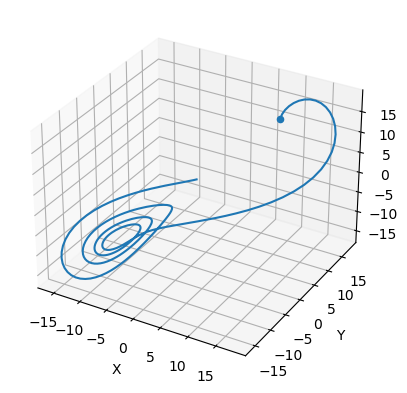

In [74]:
# Plotting trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(*delayed_x[:300].T)
ax.scatter(*delayed_x[0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

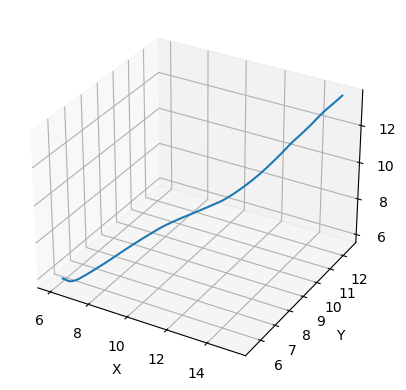

In [75]:
# Plotting trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.plot(*traj_estim.T)
#ax.plot(*traj_estim_2.T)
ax.plot(*traj_estim_3.T)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
for i in range(len(t_eval)):
    print(SOL.y.T[1].reshape(len(v),3)[1])

In [154]:
list_sol = []
for i in range(1):
 list_sol.append(SOL.y[:,i].reshape(len(v),3))
trajectories = []

In [155]:
list_sol

[array([[10.        , 11.45810292, 15.02060327],
        [10.        , 12.08043137, 15.7515597 ],
        [10.17      , 12.76848617, 16.4230208 ],
        ...,
        [ 7.43087643,  6.82971955,  6.57586245],
        [ 7.28649595,  6.74944132,  6.56996786],
        [ 7.15328258,  6.68370121,  6.57904126]])]

In [ ]:
for j in range(1):
    trajectory = []
    for i in range(len(t_eval)):
        trajectory.append(list_sol[i][j])
    trajectories.append(trajectory)